# Overpatching? Do Game Developers Patching the Game affect the Player Base

By TJ Laryea IV
December 11th, 2023

Video games are susceptible to bugs and broken mechanics or characters, and the natural remedy to these problems is for developers to patch them. Most, if not all, gamers want their competitive games to be balanced, but is it possible developers go too far with patching? Can too frequent patches or patching things players love lead to a drop in player base? In this report, I will uncover the truth and try to explain the balance of how much patching is acceptable in order to keep players happy and playing the games.

In order to perform this analysis, I will need to locate and store the numerous amounts of player data that come with all of these games. One limitation to this analysis is the fact that the player base I am analyzing is only PC players, as data on console player data numbers is extremely difficult to come by and is often hidden by the major companies in Microsoft and Sony.

The games I will be analyzing in this study are Valorant, Tom Clancy's Rainbow Six Siege, Dota 2, Apex Legends, and Counter Strike Global Offensive (CSGO). For each game, I will be going through the patch notes by the developers and finding the months in which they occurred and giving each month a number, with 0 meaning no patch and 1 indicating there was a patch within that much.

In [1]:
import pandas as pd
import bs4 
import requests as rq
import numpy as np
from datetime import datetime as dt
from scipy import stats
from matplotlib import pyplot as plt

For this analysis I used a plethora of Python packages that allow me to do many things from visualizing the data all the way to performing some statistical analysis.

For all of the data sets I found, I had to go to various websites and request the HTML content from the page. I then took the content from the websites and put it into dataframes for me to analyze.

In [2]:
r6_steam = rq.get("https://steamplayercount.com/app/359550").content

In [3]:
df_list = pd.read_html(r6_steam)

In [4]:
r6PlayerData = df_list[1]

In [36]:
r6PlayerData.head()

,Month,Peak,Gain,% Gain,Min Daily Peak,Avg Daily Peak,Months
0,November 2022,46245,-8711,-16%,27025,35649,2022-11-01
1,October 2022,54956,-11632,-18%,34640,42492,2022-10-01
2,September 2022,66588,+4634,+8%,28399,52259,2022-09-01
3,August 2022,61954,-3003,-5%,45508,51938,2022-08-01
4,July 2022,64957,-5930,-8%,51814,58944,2022-07-01


In [8]:
r6PlayerData['Months'] = [dt.strptime(x, '%B %Y') for x in r6PlayerData['Month']]

In [9]:
r6PlayerSort = pd.DataFrame(r6PlayerData.sort_values("Months", ascending = True))
r6PlayerSort

,Month,Peak,Gain,% Gain,Min Daily Peak,Avg Daily Peak,Months
90,May 2015,1,-,-,1,1,2015-05-01
89,June 2015,5,+4,+400%,1,2,2015-06-01
88,July 2015,3,-2,-40%,1,2,2015-07-01
87,August 2015,1,-2,-67%,1,1,2015-08-01
86,September 2015,3,+2,+200%,1,2,2015-09-01
...,...,...,...,...,...,...,...
4,July 2022,64957,-5930,-8%,51814,58944,2022-07-01
3,August 2022,61954,-3003,-5%,45508,51938,2022-08-01
2,September 2022,66588,+4634,+8%,28399,52259,2022-09-01
1,October 2022,54956,-11632,-18%,34640,42492,2022-10-01


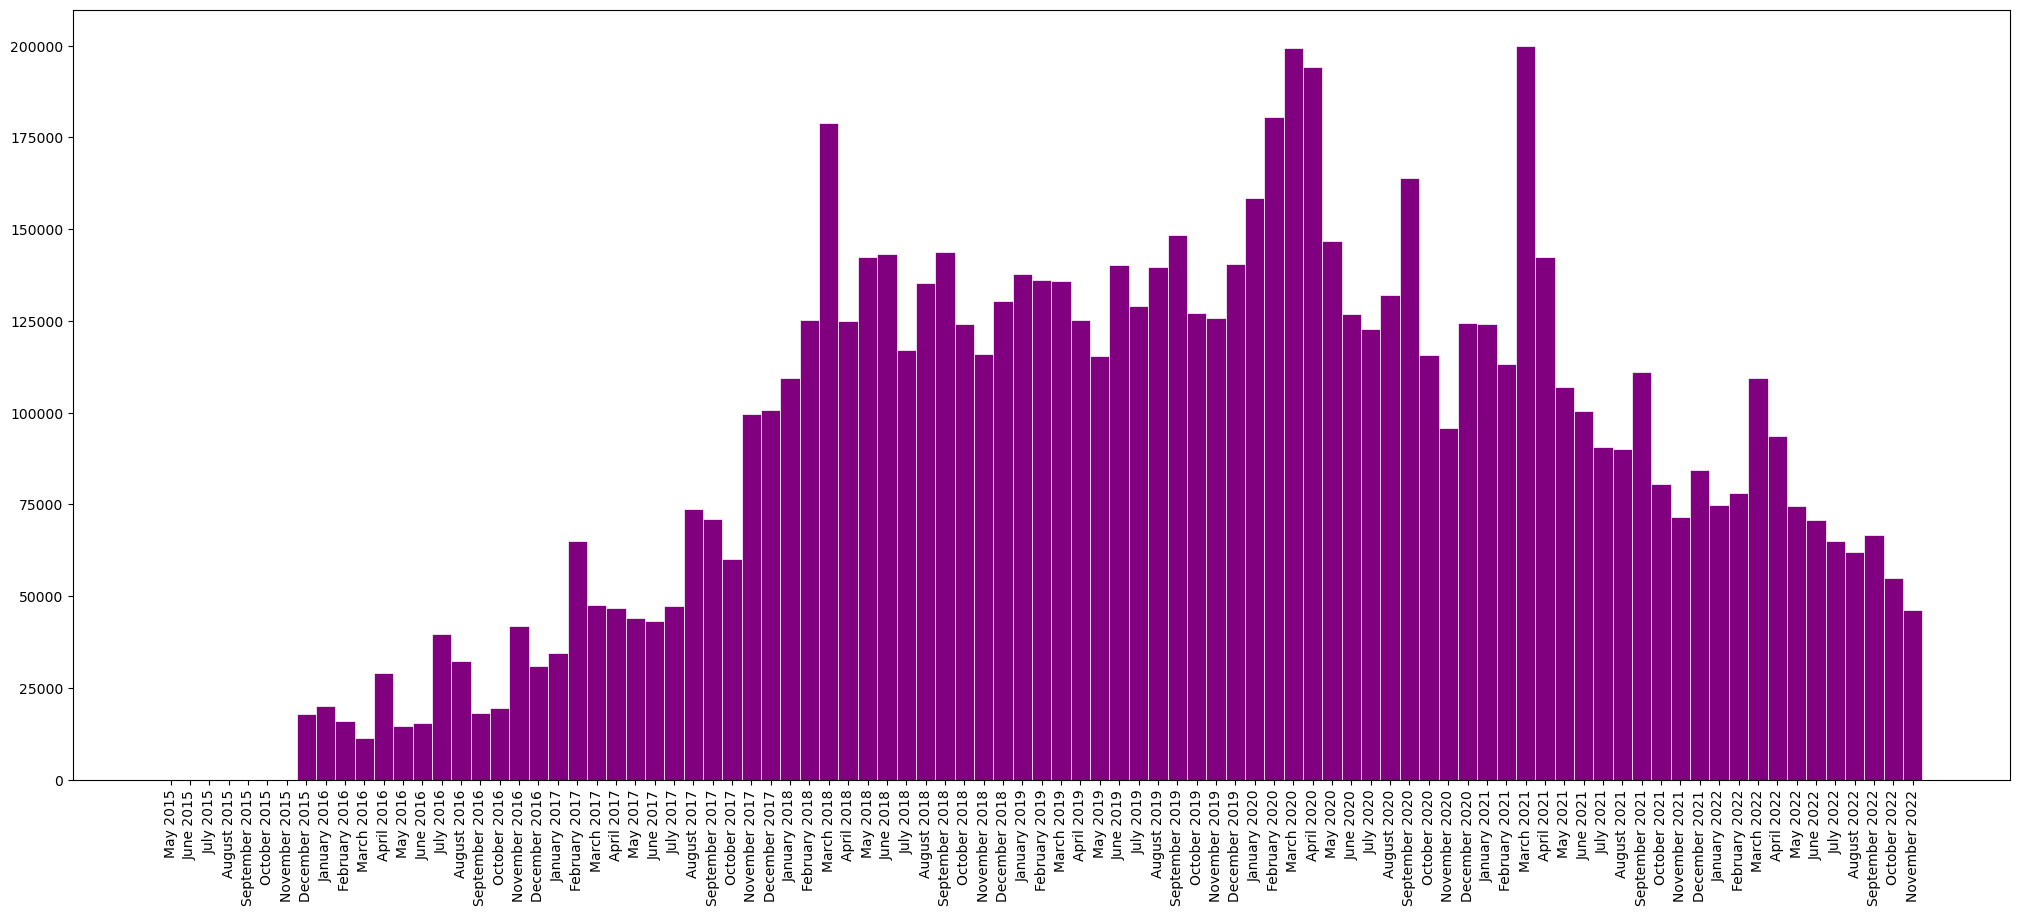

In [37]:
fig3, ax3 = plt.subplots()
ax3.bar(r6PlayerSort["Month"], r6PlayerSort["Peak"], width=1, edgecolor="white", linewidth=0.5, color = "Purple")
plt.gcf().set_size_inches(25, 10)
plt.xticks(rotation=90, ha = "center")  
plt.show()

In [12]:
csgo_steam = rq.get("https://steamplayercount.com/app/730").content

In [13]:
df_list2 = pd.read_html(csgo_steam)

In [14]:
csgoPlayerData = df_list2[1]

In [15]:
csgoPlayerData

,Month,Peak,Gain,% Gain,Min Daily Peak,Avg Daily Peak
0,November 2022,1132038,+46092,+4%,850489,983456
1,October 2022,1085946,-14752,-1%,763210,958824
2,September 2022,1100698,+63047,+6%,752906,969525
3,August 2022,1037651,+110524,+12%,710675,937706
4,July 2022,927127,+22377,+3%,816921,862058
...,...,...,...,...,...,...
128,March 2012,1264,+1060,+520%,225,735
129,February 2012,204,+204,"+20,400%",204,204
130,January 2012,0,0,0%,0,0
131,December 2011,0,-679,-100%,0,0


In [26]:
csgoPlayerData['Months'] = [dt.strptime(x, '%B %Y') for x in csgoPlayerData['Month']]
csgoPlayerSort = pd.DataFrame(csgoPlayerData.sort_values("Months", ascending = True))
csgoPlayerSort


,Month,Peak,Gain,% Gain,Min Daily Peak,Avg Daily Peak,Months
132,November 2011,679,-,-,679,679,2011-11-01
131,December 2011,0,-679,-100%,0,0,2011-12-01
130,January 2012,0,0,0%,0,0,2012-01-01
129,February 2012,204,+204,"+20,400%",204,204,2012-02-01
128,March 2012,1264,+1060,+520%,225,735,2012-03-01
...,...,...,...,...,...,...,...
4,July 2022,927127,+22377,+3%,816921,862058,2022-07-01
3,August 2022,1037651,+110524,+12%,710675,937706,2022-08-01
2,September 2022,1100698,+63047,+6%,752906,969525,2022-09-01
1,October 2022,1085946,-14752,-1%,763210,958824,2022-10-01


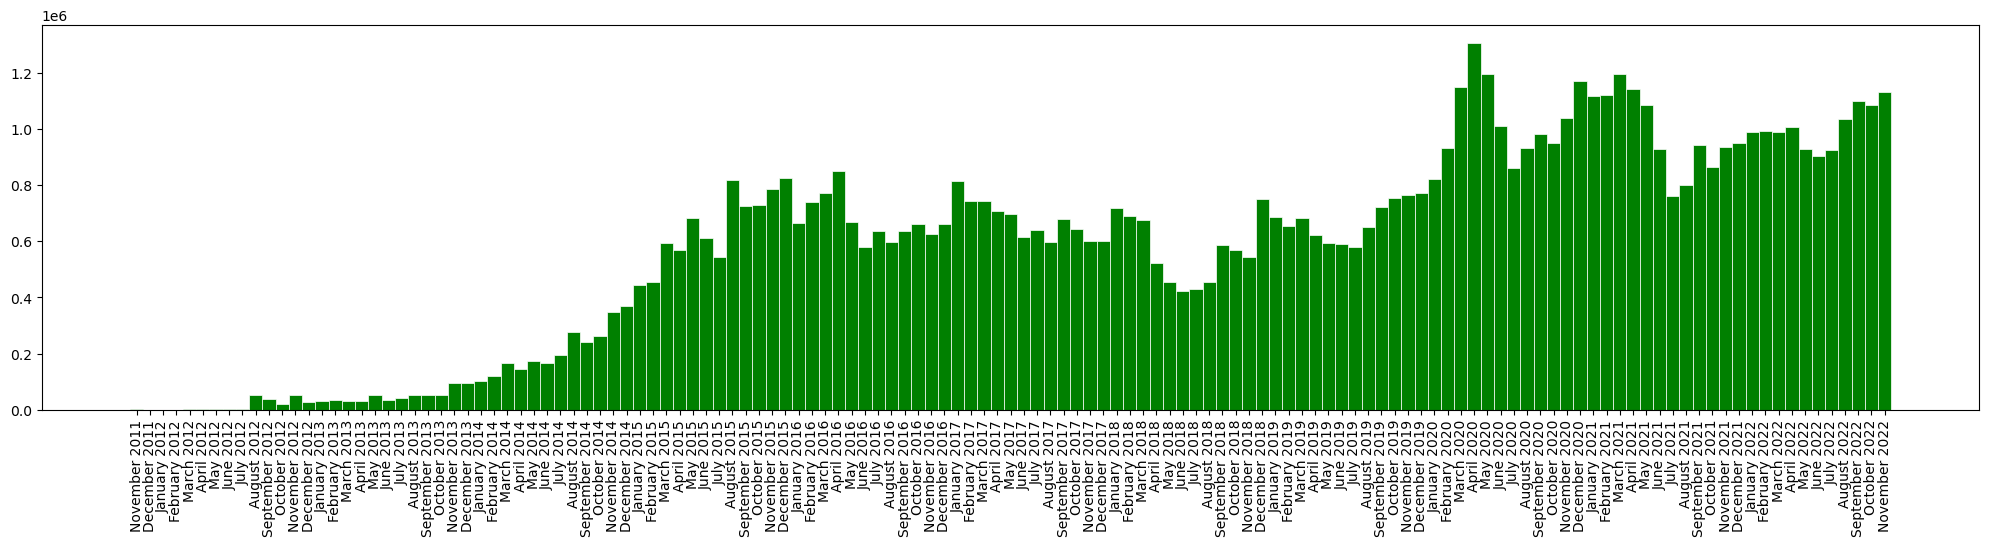

In [35]:
fig1, ax1 = plt.subplots()
ax1.bar(csgoPlayerSort["Month"], csgoPlayerSort["Peak"], width=1, edgecolor="white", linewidth=0.5, color ="Green" )
plt.gcf().set_size_inches(25, 5)
plt.xticks(rotation=90, ha="center")  
plt.show()

In [17]:
dota2_steam = rq.get("https://steamplayercount.com/app/570").content

In [18]:
df_list3 = pd.read_html(dota2_steam)

In [19]:
dota2PlayerData = df_list3[1]
dota2PlayerData

,Month,Peak,Gain,% Gain,Min Daily Peak,Avg Daily Peak
0,November 2022,990866,-39031,-4%,710459,818666
1,October 2022,1029897,+160983,+19%,604275,709988
2,September 2022,868914,+122776,+17%,514029,740854
3,August 2022,746138,+63295,+9%,590883,665801
4,July 2022,682843,-16156,-2%,574129,625210
...,...,...,...,...,...,...
130,January 2012,23515,+3379,+17%,16467,19245
131,December 2011,20136,+7763,+63%,12199,16927
132,November 2011,12373,+11787,"+2,012%",511,5070
133,October 2011,586,+274,+88%,331,479


In [20]:
valorant_tracker = rq.get("https://tracker.gg/valorant/population").content

In [21]:
df_list4 = pd.read_html(valorant_tracker)
valorantPlayerData = df_list4[0]
valorantPlayerData.head()

,Date,Players Count,Gain,% Gain
0,December 2023,7284731,...,...
1,November 2023,16457140,-819760,-4.7%
2,October 2023,17276900,-1222156,-6.6%
3,September 2023,18499056,-1395444,-7.0%
4,August 2023,19894500,-520251,-2.5%


In [22]:
apex_steam = rq.get("https://steamplayercount.com/app/1172470").content

In [23]:
df_list5 = pd.read_html(apex_steam)
apexPlayerData = df_list5[1]

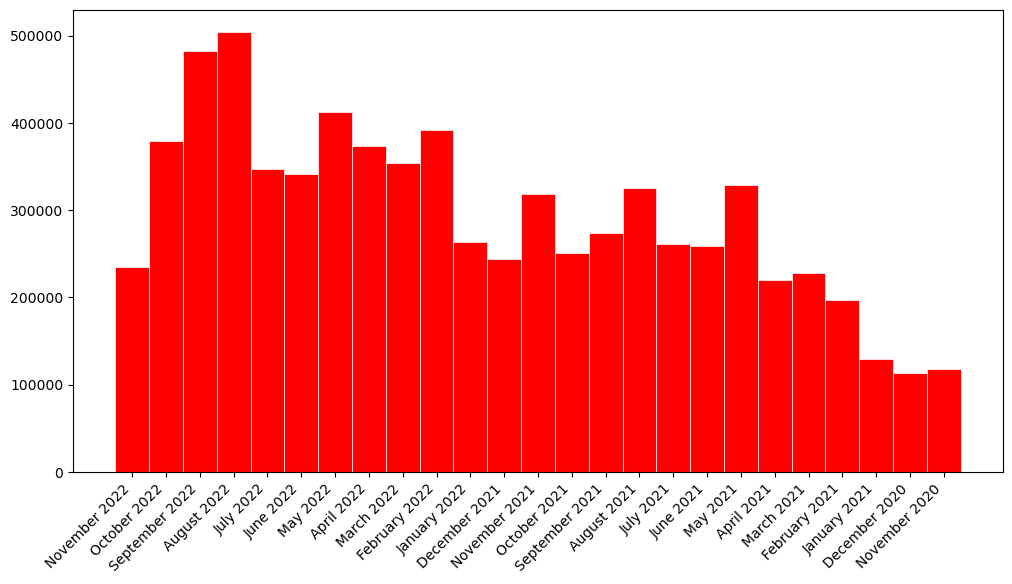

In [33]:
fig2, ax2 = plt.subplots()
ax2.bar(apexPlayerData["Month"], apexPlayerData["Peak"], width=1, edgecolor="white", linewidth=0.5, color = "red")
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha="right")  
plt.show()